In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sns.set()

# Por temas de visibilidad voy a sacar límites a la cantidad de filas y columnas que pandas muestra
pd.set_option("display.max_rows", 100, "display.max_columns", 100) 

# Carga

In [2]:
raw_cars_data = pd.read_excel('cars_data.xlsx')

# Preprocesamiento

### Exploración del dataset

In [3]:
# Vemos las primeras 5 filas de nuestro dataset para saber con que variables trabajamos 
raw_cars_data.head()

# De la filas en el dataset podemos ver que dentro del campo "Nombre" se encuentran la marca y el modelo del auto
# Lo ideal sería separar el campo para obtener estos dos en filas separadas
# Notese que la primer palabra del campo "Nombre" pareciere coincidir con la Marca

,Nombre,Moneda,Precio,Año,Tipo de combustible,Puertas,Kilómetros,Color,Transmisión,Motor,Tipo de carrocería,Patente
0,Volkswagen Combi Furgón,U$S,4.000,1990,Diésel,4.0,1111 km,NaN,NaN,NaN,NaN,NaN
1,Suzuki Alto 0.8 800,U$S,6.500,2015,Nafta,5.0,103000 km,Azul,Manual,0.8,Hatchback,NaN
2,Volkswagen Up! Move,U$S,14.890,2021,Nafta,4.0,0 km,Blanco,Manual,1.0,NaN,NaN
3,Chevrolet S-10 pick up Diesel,U$S,7.900,1998,Diésel,2.0,280000 km,NaN,NaN,NaN,NaN,NaN
4,Renault Sandero 1.0 Zen,U$S,13.000,2020,Nafta,5.0,14000 km,NaN,Manual,1.0,Hatchback,NaN


In [4]:
# Obtenemos una breve descripción de las filas de nuestro dataset
raw_cars_data.describe(include='all')

# A la vista saltan un par de irregularidades, la primera es que la columna "Patente" se encuentra vacía
# La segunda es que en la columna de Puertas tenemos un valor negativo

,Nombre,Moneda,Precio,Año,Tipo de combustible,Puertas,Kilómetros,Color,Transmisión,Motor,Tipo de carrocería,Patente
count,18088,18088,18088,18088.000000,18088,18083.000000,18088,8607,14269,14025,13189,0.0
unique,10844,2,1317,NaN,9,NaN,2764,248,4,624,15,NaN
top,Suzuki Alto 0.8 800,U$S,8.500,NaN,Nafta,NaN,0 km,Blanco,Manual,1.6,Hatchback,NaN
freq,77,17603,303,NaN,16007,NaN,3235,2419,11672,3729,4641,NaN
mean,NaN,NaN,NaN,2011.213512,NaN,11.619587,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,9.673927,NaN,899.267466,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1900.000000,NaN,-4.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2009.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2014.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2018.000000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Determinamos variables de interes y modelamos el dataset

In [5]:
# Borramos las filas de Patente ya que esta vacía y la de Color por parecer no relevante para la estimación del precio
cars_data = raw_cars_data.drop([ 'Patente' , 'Color' ],axis=1)

In [6]:
# Fijamos cuantos autos tienen un número de puertas menor o igual a 0
cars_data[cars_data['Puertas'] <= 0]

,Nombre,Moneda,Precio,Año,Tipo de combustible,Puertas,Kilómetros,Transmisión,Motor,Tipo de carrocería
17242,Karry Q22 Furgon,U$S,11.690,2020,Nafta,-4.0,0 km,Manual,1.3,Furgón


In [7]:
# Ya que solo tenemos un auto con Puertas menos o igual a 0 vamos a removerlo del dataset
cars_data = cars_data.drop(17242)

### Obteniendo Marca y Modelo de Nombre

In [8]:
# Obtenemos la primer palabra del campo Nombre de nuestro dataset y borramos duplicados
print("Cantidad de marcas dstintas:\n \n" , len(cars_data.Nombre.str.split(' ', 1 ,expand = True)[0].unique()))
print("\n Marcas distintas:\n \n" , cars_data.Nombre.str.split(' ', 1 ,expand = True)[0].unique())

# Podemos observar que la mayoría de las primeras palabras son marcas, pero muchas de ellas estan mal escritas
# Ej: Volkswagen y Volkwagen
# Parece aceptable entonces asumir que la primer palabra de cada Nombre pertenecen en su mayoría a la marca del vehículo
# Sin usar modelos mas avanzados no nos queda otra de trabajar el problema de manera manual

Cantidad de marcas dstintas:
 
 303

 Marcas distintas:
 
 ['Volkswagen' 'Suzuki' 'Chevrolet' 'Renault' 'Ford' 'Hyundai' 'Toyota'
 'Vendo' 'Lifan' 'BMW' 'Peugeot' 'Audi' 'Fiat' 'Kia' 'Mitsubishi'
 'Citroën' 'Fusca' 'Karry' 'Bmw' 'Great' 'Nissan' 'Gonow' 'Jac' 'Geely'
 'DFSK' 'Chery' 'BYD' 'Dfsk' 'Victory' 'ZxAuto' 'Honda' 'Brilliance'
 'Mercedes' 'Rnault' 'JAC' 'Camioneta' 'Effa' 'Gwm' 'Dodge' 'Corsa'
 'Mercedes-benz' 'Mercedes-Benz' 'Simca' 'Yumbo' 'Lada' 'Jeep' 'Daihatsu'
 'Rover' 'Faw' 'Subaru' 'Humer' 'Mahindra' 'Chana' 'Daewoo' 'Hiunday'
 'Changan' 'Jmc' 'Mini' 'Changhe' 'MG' 'Foton' 'Bebesit' 'Chrysler'
 'Autos' 'Internacional' 'Nuevo' 'Byd' 'Jaguar' 'Land' 'Citroen' 'Amaya'
 'Vw' 'Jetour' 'Mazda' 'Volvo' '' 'Porsche' 'Citreon' 'Cadillac' 'Morris'
 'Mitshubislli' 'Nueva' 'Mg' 'SEAT' 'Zna' 'Nissanfrontier' 'Bestune'
 'Zxauto' 'Austin' 'Isuzu' 'Ssangyong' 'CitroÃ«n' 'Tata' 'WINGLE' 'JMC'
 'Rio' 'Vectra' 'Jac-refine' 'Oportunidad' 'Precioso' 'Lavadero' 'Seat'
 'Zotye' 'Haima' 'Daiha

In [9]:
# Para las siguientes marcas vamos a tomar la segunda palabra en vez de la primera:
# Vendo, Camioneta, Nuevo, Nueva, Oportunidad, New
# Para ello vamos a quitar esas palabras mas un espacio

cars_data['Nombre'] = cars_data['Nombre'].str.replace('Vendo ','')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Camioneta ','')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Nuevo ','')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Nueva ','')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Oportunidad ','')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('New ','')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('!! ','')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Buen Estado ','')

In [10]:
# Agregamos el campo Marca a nuestro dataset el cual va a ser igual a la primer palabra de la columna "Nombre"
cars_data['Marca'] = cars_data.Nombre.str.split(' ', 1 ,expand = True)[0]

In [11]:
# Mostramos cuantas veces se repite cada marca en nuestor dataset
count_nombre = cars_data.groupby('Marca').count().sort_values(by = 'Nombre', ascending = False)[['Nombre']] 
count_nombre.head()

,Nombre
Marca,
Chevrolet,2326
Volkswagen,2162
Peugeot,1309
Renault,1300
Fiat,1252


In [12]:
# Aprovechando los resultados de la tabla anterior creamos una tabla de frecuencias.
count_nombre.reset_index().groupby('Nombre').count().reset_index().sort_values(by = 'Nombre')

# Lo que nos muestra es que hay 158 marcas que solo aparecen una vez, 29 que solo aparecen 2 y asi.

,Nombre,Marca
0,1,165
1,2,32
2,3,19
3,4,15
4,5,4
5,6,3
6,8,4
7,9,2
8,10,1
9,11,3


In [13]:
#Borramos todas las marcas que parecen 8 veces o menos
accepted_models = count_nombre[count_nombre['Nombre'] > 8].reset_index()['Marca'].values

cars_data = cars_data[cars_data['Marca'].isin(accepted_models)]

print("Cantidad de marcas dstintas:\n \n" , len(cars_data.Nombre.str.split(' ', 1 ,expand = True)[0].unique()))
print("\n Marcas distintas:\n \n" , cars_data.Nombre.str.split(' ', 1 ,expand = True)[0].unique())

Cantidad de marcas dstintas:
 
 69

 Marcas distintas:
 
 ['Volkswagen' 'Suzuki' 'Chevrolet' 'Renault' 'Ford' 'Hyundai' 'Toyota'
 'Lifan' 'BMW' 'Peugeot' 'Audi' 'Fiat' 'Kia' 'Mitsubishi' 'Citroën'
 'Karry' 'Bmw' 'Great' 'Nissan' 'Gonow' 'Jac' 'Geely' 'DFSK' 'Chery' 'BYD'
 'Dfsk' 'Victory' 'ZxAuto' 'Honda' 'Mercedes' 'JAC' 'Effa' 'Gwm' 'Dodge'
 'Mercedes-benz' 'Mercedes-Benz' 'Lada' 'Jeep' 'Daihatsu' 'Rover' 'Faw'
 'Subaru' 'Chana' 'Daewoo' 'Changan' 'Jmc' 'Mini' 'Changhe' 'Foton'
 'Chrysler' 'Byd' 'Jaguar' 'Land' 'Citroen' 'Amaya' 'Vw' 'Jetour' 'Mazda'
 'Volvo' 'Porsche' 'SEAT' 'Ssangyong' 'Wingle' 'Tata' 'Seat' 'Haima'
 'Opel' 'Alfa' 'Ram']


In [14]:
# Iremos uno por uno cambiando los nombres de las marcas mal escritos de manera más frecuente en nuestra columna Nombre
cars_data['Nombre'] = cars_data['Nombre'].str.replace('bmw','BMW')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Bmw','BMW')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Citroen','Citroën')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Jac','JAC')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Dfsk','DFSK')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Byd','BYD')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Mercedes-Benz','Mercedes')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Mercedes-benz','Mercedes')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Mercedes','Mercedes-Benz')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('Seat','SEAT')

cars_data['Marca'] = cars_data.Nombre.str.split(' ', 1 ,expand = True)[0]

In [15]:
print("Cantidad de marcas dstintas:\n \n" , len(cars_data.Nombre.str.split(' ', 1 ,expand = True)[0].unique()))
print("\n Marcas distintas:\n \n" , cars_data.Nombre.str.split(' ', 1 ,expand = True)[0].unique())

# Solo 61 marcas distinas es una gran mejora por un costo de 300 filas en nuestro dataset

Cantidad de marcas dstintas:
 
 61

 Marcas distintas:
 
 ['Volkswagen' 'Suzuki' 'Chevrolet' 'Renault' 'Ford' 'Hyundai' 'Toyota'
 'Lifan' 'BMW' 'Peugeot' 'Audi' 'Fiat' 'Kia' 'Mitsubishi' 'Citroën'
 'Karry' 'Great' 'Nissan' 'Gonow' 'JAC' 'Geely' 'DFSK' 'Chery' 'BYD'
 'Victory' 'ZxAuto' 'Honda' 'Mercedes-Benz' 'Effa' 'Gwm' 'Dodge' 'Lada'
 'Jeep' 'Daihatsu' 'Rover' 'Faw' 'Subaru' 'Chana' 'Daewoo' 'Changan' 'Jmc'
 'Mini' 'Changhe' 'Foton' 'Chrysler' 'Jaguar' 'Land' 'Amaya' 'Vw' 'Jetour'
 'Mazda' 'Volvo' 'Porsche' 'SEAT' 'Ssangyong' 'Wingle' 'Tata' 'Haima'
 'Opel' 'Alfa' 'Ram']


In [16]:
# Finalmente volvemos a definir nuestra columna de marca sobre nuestra columna de nombre alterada
cars_data['Marca'] = cars_data.Nombre.str.split(' ', 1 ,expand = True)[0]

In [17]:
# Ahora intentaremos los mismas transformaciones aplicadas para obtener la Marca
# Pero esta vez con el objetivo de obtener el modelo
cars_data['Modelo'] = cars_data.Nombre.str.split(' ', 2 ,expand = True)[1]

In [18]:
# Mostramos cuantas veces se repite cada modelo en nuestor dataset
count_model = cars_data.groupby('Modelo').count().sort_values(by = 'Nombre', ascending = False)[['Nombre']] 
count_model.head()

,Nombre
Modelo,
Gol,770
Saveiro,400
Corsa,368
Hilux,321
Uno,286


In [19]:
# Volvemos a obtener las frecuencias pero esta vez para los modelos
count_model.reset_index().groupby('Nombre').count().reset_index().sort_values(by = 'Nombre')

# Al igual que con el dataset anterior volvemos a ver una relación de muchos Modelos que no pertenecen que solo aparecen una vez
# Vamos a aplicar la misma metodología pero con todos aquellos que aparezcan menos de 10 veces

,Nombre,Modelo
0,1,415
1,2,120
2,3,62
3,4,45
4,5,41
5,6,40
6,7,18
7,8,12
8,9,21
9,10,13


In [20]:
print("Cantidad de modelos distintos antes del recorte:\n \n" , len(cars_data.Nombre.str.split(' ', 2 ,expand = True)[1].unique()))
print("\n Cantidad filas antes del recorte: " , len(cars_data))

#Borramos todas las marcas que parecen 8 veces o menos
accepted_models = count_model[count_model['Nombre'] >= 10].reset_index()['Modelo'].values

cars_data = cars_data[cars_data['Modelo'].isin(accepted_models)]
print('--------------------------------------------------------------------------')
print("\n Cantidad de modelos distintos después del recorte:\n \n" , len(cars_data.Nombre.str.split(' ', 2 ,expand = True)[1].unique()))
print("\n Cantidad filas después del recorte: " , len(cars_data))
print("\n Modelos distintas:\n \n" , cars_data.Nombre.str.split(' ', 2 ,expand = True)[1].unique())

Cantidad de modelos distintos antes del recorte:
 
 1038

 Cantidad filas antes del recorte:  17671
--------------------------------------------------------------------------

 Cantidad de modelos distintos después del recorte:
 
 263

 Cantidad filas después del recorte:  15786

 Modelos distintas:
 
 ['Alto' 'Up!' 'S-10' 'Sandero' 'Saveiro' 'Fiesta' 'Hb20' 'Escort' 'Vento'
 'Hilux' 'X50' 'Serie' '405' 'Palio' 'Cerato' 'Eclipse' 'Gol' '301' '208'
 'Sail' 'Tracker' 'T-Cross' 'Polo' 'Onix' 'Xsara' 'Corsa' '106' 'Clio'
 'Master' 'Q22' 'Veloster' 'Uno' 'Wall' '306' 'Sentra' 'Cargo' '206'
 'Bora' 'Partner' 'Tiida' 'Ranger' 'Berlingo' 'Frontier' 'Duster' 'L200'
 'HB20' '' 'Celta' 'Note' 'Nivus' 'Atos' 'Accent' 'Kicks' 'H1' 'Jumpy'
 'C3' 'Toro' 'Asx' 'Santa' 'Aveo' 'Captiva' 'Ecosport' 'J2' 'Swift'
 'Corolla' 'LC' 'Virtus' 'X1' '2008' 'Tiguan' 'Qq' 'F0' 'Strada' 'Oroch'
 'Prius' 'Tucson' 'C-Elysée' 'Versa' 'Ioniq' 'Amarok' 'Focus' 'Kangoo'
 'Doble' 'S10' 'Golf' 'Twingo' 'Q5' 'Fit' 'Kwid' 'Ti

In [21]:
# Al igual que anteriormente, iremos cambiando uno a uno los modelos que estan frecuentemente mal escritos
cars_data['Nombre'] = cars_data['Nombre'].str.replace('S10','S-10')
cars_data['Nombre'] = cars_data['Nombre'].str.replace('HB20','Hb20')

In [22]:
# Realizados los cambios de pre paración volveremos a redefinir nuestra columna modelo como la segunda palabra que aparece
# en la columna nombre
cars_data['Modelo'] = cars_data.Nombre.str.split(' ', 2 ,expand = True)[1]

In [23]:
# Realizamosa pre procesados necesarios para modelos que van a ser represeentativos en nuestro dataset

# Como tenemos definido nuestros modelos, algunos van a dar '' como su marca, por lo cual decidimos tomar el 3er valor en vez del segundo
cars_data.loc[cars_data['Modelo'] == '', 'Modelo'] = cars_data.Nombre.str.split(' ', 3 ,expand = True)[2]

# La marca BMW tiene todos sus modelos como Serie por lo tanto como su modelo tomaremos el número de serie
cars_data.loc[cars_data['Modelo'] == 'Serie', 'Modelo'] = cars_data.Nombre.str.split(' ', 3 ,expand = True)[2]

In [24]:
print("\n Cantidad de modelos distintas:\n \n" , len(cars_data.Modelo.unique()))
print("\n Modelos distintos:\n \n" , cars_data.Modelo.unique())


 Cantidad de modelos distintas:
 
 281

 Modelos distintos:
 
 ['Alto' 'Up!' 'S-10' 'Sandero' 'Saveiro' 'Fiesta' 'Hb20' 'Escort' 'Vento'
 'Hilux' 'X50' '2' '405' 'Palio' 'Cerato' 'Eclipse' 'Gol' '301' '208'
 'Sail' 'Tracker' 'T-Cross' 'Polo' 'Onix' 'Xsara' 'Corsa' '106' 'Clio'
 'Master' 'Q22' 'Veloster' 'Uno' 'Wall' '306' 'Sentra' 'Cargo' '206'
 'Bora' 'Partner' 'Tiida' 'Ranger' 'Berlingo' 'Frontier' 'Duster' 'L200'
 'Celta' 'Note' 'Nivus' 'Atos' 'Accent' 'Kicks' 'H1' 'Jumpy' 'C3' 'Toro'
 'Asx' 'Santa' 'Aveo' 'Captiva' 'Ecosport' 'J2' 'Swift' 'Corolla' 'LC'
 'Virtus' 'X1' '2008' 'Tiguan' 'Qq' 'F0' 'Strada' 'Oroch' 'Prius' 'Tucson'
 'C-Elysée' 'Versa' 'Ioniq' 'Amarok' 'Focus' 'Kangoo' 'Doble' 'Golf'
 'Twingo' 'Q5' 'Fit' 'Kwid' 'Tiggo' 'Ciaz' 'Benz' '5' 'Emgrand' 'Celerio'
 'C4' 'Spark' 'Cruze' 'Cobalt' 'I10' 'Expert' '3008' 'Prisma' 'S-presso'
 'March' 'QQ3' '207' 'DS3' 'Ka' '205' 'Parati' 'Vitara' 'Fiorino' 'Siena'
 'Box' 'Wingle' 'i10' 'Lancer' 'D21' 'H100' 'F3' 'Ram' 'Sportage' 'Dun

### Lidiando con valores faltantes 

In [25]:
# Con la siguiente línea obtenemos la cantidad de valores faltantes en nuestro dataset para cada una
# de las columnas
cars_data.isnull().sum()

Nombre                    0
Moneda                    0
Precio                    0
Año                       0
Tipo de combustible       0
Puertas                   3
Kilómetros                0
Transmisión            2999
Motor                  3160
Tipo de carrocería     3859
Marca                     0
Modelo                    3
dtype: int64

In [26]:
# Para el caso de los valores faltantes en Puertas y Modelo, al tratarse de tan pocos valores, simplemente elimnamos las filas
# con valores faltantes del dataset
cars_data_no_mv = cars_data.dropna(subset = ['Puertas','Modelo'] , axis = 0)

In [27]:
# Para el caso de Transmisión, Motor y Tipo de carrocería lamentablemente tenemos muchos valores falantantes
# por lo cual simplemente borrar los valores faltantes de nuestro dataset no es una opción viable.
# A partrir de este punto tenemos varias opciones, la primera y mas idonea sería tener una carta con las cualidades
# de cada cada vehículo e implantar esos valores en nuestro dataset según su Modelo y Marca.
# Como no contamos con un dataset de las características reales para cada uno de nuestros vehículos, otra opción sería
# reemplazar estos valores por los de aparición mas frecuente en nuestro dataset, llamado la moda, o para el caso de
# variables númericos también puede ser la media, o más complicado todavía, usar un algoritmo como KNN para estimar estos valores
# Una tercera opción es olvidarnos de estos features y quitarnos del dataset.
# Por simplicidad del análisis optamos por esta última opción
cars_data_no_mv = cars_data_no_mv.drop(['Transmisión','Motor','Tipo de carrocería'], axis = 1)

### Formato de columnas

In [28]:
# Tenemos ciertos problemas en nuestro dataset respecto a los valores y como son representados.
# Lo más lógico sería trabajar con el kilometraje de un auto como si fuera un número,
# pero al contener la palabra 'km' al final, eso nos dificulta la tarea.
# También tenemos el problema de kilometrajes que tienen un '.' como separador de miles
# lo cuál python interpreta como un separador de decimales.
cars_data_no_mv['Kilómetros'].head()

1    103000 km
2         0 km
3    280000 km
4     14000 km
5         0 km
Name: Kilómetros, dtype: object

In [29]:
# Realizamos los cambios necesarios en nuestra columna
cars_data_no_mv['Kilómetros'] = cars_data_no_mv['Kilómetros'].str.replace(' km','')
cars_data_no_mv['Kilómetros'] = cars_data_no_mv['Kilómetros'].str.replace('.','')

# Convertimos nuestra columna de kilometraje a número
cars_data_no_mv['Kilómetros'] = cars_data_no_mv['Kilómetros'].astype(int)

c:\programdata\anaconda3\envs\plibre\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
# Tenemos el mismo problema de puntos con el precio, corrijamoslo de la misma manera
cars_data_no_mv['Precio'] = cars_data_no_mv['Precio'].str.replace('.','')
cars_data_no_mv['Precio'] = cars_data_no_mv['Precio'].astype(float)

c:\programdata\anaconda3\envs\plibre\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


### Transformando Precios a dólares 

In [31]:
# En nuestro dataset tenemos artículos listados tanto en pesos como en dólares
# Como forma de estandarizar esta columna pasaremos todos los precios a dólares basandonos en una cotización aproximada a a la fecha
cars_data_no_mv.loc[cars_data_no_mv['Moneda'] == '$', 'Precio'] = cars_data_no_mv.Precio * 44

In [32]:
# Ahora que ya nuestros precios estan todos en dólares, no tenemos uso para la columna moneda
# asi que la quitaremos del dataset
cars_data_no_mv.drop('Moneda', axis = 1, inplace =True)

In [33]:
# Nuestro dataset final se ve de la siguiente manera:
cars_data_no_mv.describe(include='all')

,Nombre,Precio,Año,Tipo de combustible,Puertas,Kilómetros,Marca,Modelo
count,15780,1.578000e+04,15780.000000,15780,15780.000000,1.578000e+04,15780,15780
unique,8725,NaN,NaN,8,NaN,NaN,52,280
top,Suzuki Alto 0.8 800,NaN,NaN,Nafta,NaN,NaN,Chevrolet,Gol
freq,77,NaN,NaN,14144,NaN,NaN,2244,770
mean,NaN,9.922601e+06,2011.902091,NaN,12.730292,1.907545e+05,NaN,NaN
std,NaN,5.265929e+08,8.576012,NaN,962.653656,8.108895e+06,NaN,NaN
min,NaN,1.000000e+00,1947.000000,NaN,2.000000,0.000000e+00,NaN,NaN
25%,NaN,8.500000e+03,2010.000000,NaN,4.000000,2.160000e+04,NaN,NaN
50%,NaN,1.200000e+04,2014.000000,NaN,4.000000,9.000000e+04,NaN,NaN
75%,NaN,1.890000e+04,2018.000000,NaN,5.000000,1.410000e+05,NaN,NaN


### Explorando PDFs 

c:\programdata\anaconda3\envs\plibre\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Precio', ylabel='Density'>

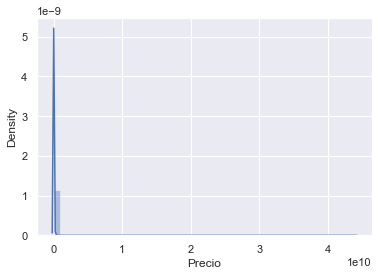

In [34]:
# PDF refiere a probability distribution function y es una herramiente muy útil para entender como una variable se
# encuentra distribuida
# De esta manera podemos identificar anomalías en nuestro dataset
sns.distplot(cars_data_no_mv['Precio'])

In [35]:
# Observando el gráfido de distribución anterior, evidentemente hay un monton de outliers en el precio.
# Para arreglar este problema una de las posibles soluciones es remover de nuestro dataset estos 'outliers'
# Para ello vamos a realizar dos transformaciones:
# Primero remover el 2% de los precios mas altos que tenemos
# Segundo vamos a remover todos los precios menores a 1500 ya que precios menores a ese pueden ser errores en la fijación
q = cars_data_no_mv['Precio'].quantile(0.98)
data_1 = cars_data_no_mv[cars_data_no_mv['Precio'] < q]
data_1 = data_1[data_1['Precio'] > 1500]

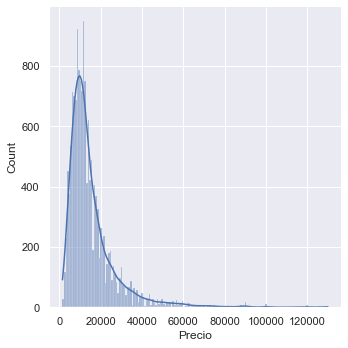

In [36]:
sns.displot(data_1['Precio'], kde=True)

c:\programdata\anaconda3\envs\plibre\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilómetros', ylabel='Density'>

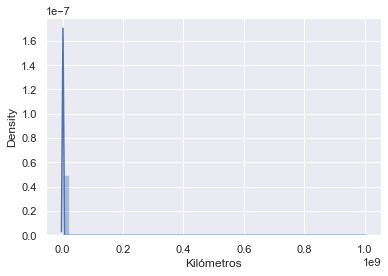

In [37]:
# Realizaremos las mismas transformaciones a los kilometros
sns.distplot(data_1['Kilómetros'])

In [38]:
# Borraremos el 1% de los vehículos con el kilometraje mas alto
q = data_1['Kilómetros'].quantile(0.99)
data_2 = data_1[data_1['Kilómetros']<q]

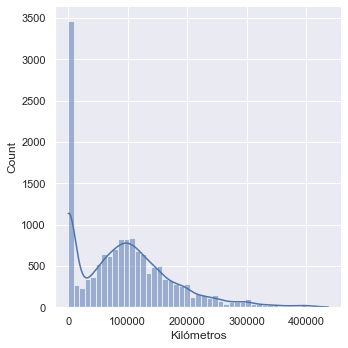

In [39]:
sns.displot(data_2['Kilómetros'], kde=True)

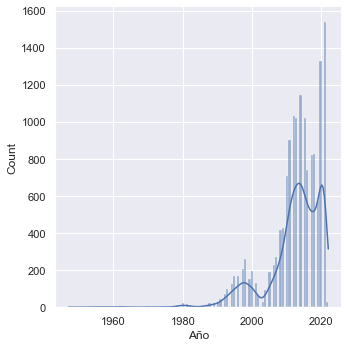

In [40]:
sns.displot(data_2['Año'], kde=True)

In [41]:
q = data_2['Año'].quantile(0.01)
data_3 = data_2[data_2['Año'] > q]

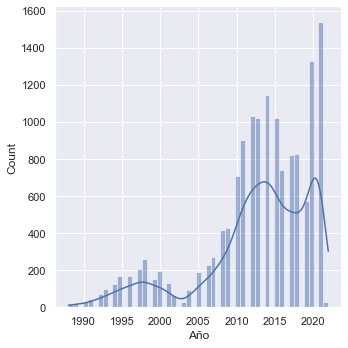

In [42]:
sns.displot(data_3['Año'], kde=True)

In [160]:
# Creamos una copia de nuestro dataset
data_cleaned = data_3.copy()

# Vemos lo que quedo
data_cleaned.describe(include='all')

,Nombre,Precio,Año,Tipo de combustible,Puertas,Kilómetros,Marca,Modelo
count,15118,15118.000,15118.000,15118,15118.000,15118.000,15118,15118
unique,8316,NaN,NaN,8,NaN,NaN,51,279
top,Suzuki Alto 0.8 800,NaN,NaN,Nafta,NaN,NaN,Chevrolet,Gol
freq,75,NaN,NaN,13699,NaN,NaN,2141,751
mean,NaN,15769.786,2012.651,NaN,13.134,95587.841,NaN,NaN
std,NaN,12716.615,7.228,NaN,983.504,81694.954,NaN,NaN
min,NaN,1600.000,1988.000,NaN,2.000,0.000,NaN,NaN
25%,NaN,8500.000,2010.000,NaN,4.000,23500.000,NaN,NaN
50%,NaN,12000.000,2014.000,NaN,4.000,90000.000,NaN,NaN
75%,NaN,18390.000,2018.000,NaN,5.000,140000.000,NaN,NaN


### Revisando supuesto de Linealidad

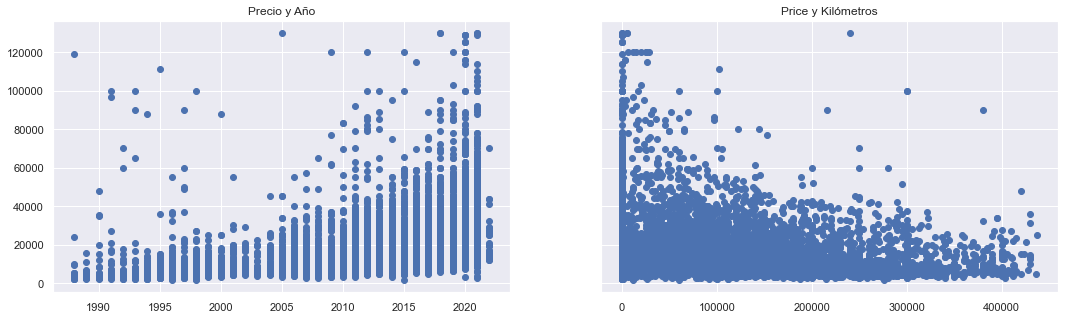

In [161]:
# Vemos como se expresa nuestro precio en función de los diferentes años
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(18,5))
ax1.scatter(data_cleaned['Año'],data_cleaned['Precio'])
ax1.set_title('Precio y Año')
ax2.scatter(data_cleaned['Kilómetros'],data_cleaned['Precio'])
ax2.set_title('Price y Kilómetros')

plt.show()

In [162]:
# Vamos a transformar nuestro precio a logaritmo para obtener una mejor relación lineal
# Usamos logaritmo ya que nuestra distribución de precio es asimilada a una exponencial
log_price = np.log(data_cleaned['Precio'])

data_cleaned['log_precio'] = log_price
data_cleaned.head()

,Nombre,Precio,Año,Tipo de combustible,Puertas,Kilómetros,Marca,Modelo,log_precio
1,Suzuki Alto 0.8 800,6500.000,2015,Nafta,5.000,103000,Suzuki,Alto,8.780
2,Volkswagen Up! Move,14890.000,2021,Nafta,4.000,0,Volkswagen,Up!,9.608
3,Chevrolet S-10 pick up Diesel,7900.000,1998,Diésel,2.000,280000,Chevrolet,S-10,8.975
4,Renault Sandero 1.0 Zen,13000.000,2020,Nafta,5.000,14000,Renault,Sandero,9.473
5,Volkswagen Saveiro saveiro doble cabina Cross,20990.000,2021,Nafta,2.000,0,Volkswagen,Saveiro,9.952


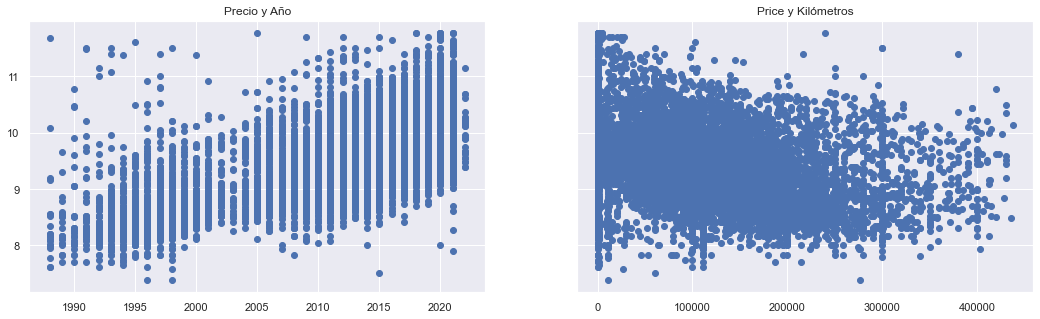

In [163]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(18,5))
ax1.scatter(data_cleaned['Año'],data_cleaned['log_precio'])
ax1.set_title('Precio y Año')
ax2.scatter(data_cleaned['Kilómetros'],data_cleaned['log_precio'])
ax2.set_title('Price y Kilómetros')

plt.show()

### Multicolinearidad

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definimos las variables que vamos a estudiar por multicolinearidad
# vif = variance influence factor
variables = data_cleaned[['Precio','Año','Kilómetros','Puertas']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [165]:
# Por lo general los valores VIF entre 1 y 5 estan ok y los mayores a ellos no y no deberían usarse como features
# En nuestro caso nuestro VIF de Año esta apenas por arriba de 5 pero vamos a mantenerlo de todos modos
vif

,VIF,Features
0,2.866,Precio
1,5.355,Año
2,2.652,Kilómetros
3,1.000,Puertas


# Creando dummy variables

In [166]:
df_set = data_cleaned.copy() 

In [52]:
# Antes de crear nuestras dummy variables vamos a borrar la columna "Nombre" que hasta ahora la habiamos mantenido
# y también la cariable de precio ya que trabajaremos con su versión de logaritmo
data_cleaned = data_cleaned.drop(['Nombre','Precio'], axis = 1)

In [53]:
# Con la siguiente línea obtenemos una columna para cada una de nuestras valores distintos de marca, combusible y modelo
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [54]:
# Resultado
data_with_dummies.columns

Index(['Año', 'Puertas', 'Kilómetros', 'log_precio',
       'Tipo de combustible_Diésel', 'Tipo de combustible_Eléctrico',
       'Tipo de combustible_Híbrido', 'Tipo de combustible_Híbrido/Diesel',
       'Tipo de combustible_Híbrido/Nafta', 'Tipo de combustible_Nafta',
       ...
       'Modelo_X50', 'Modelo_X7', 'Modelo_X70', 'Modelo_XV', 'Modelo_Xsara',
       'Modelo_Yaris', 'Modelo_ZX', 'Modelo_Zafira', 'Modelo_Zx',
       'Modelo_i10'],
      dtype='object', length=339)

# Modelo de regresión lineal

### Declarando inputs y targets

In [55]:
data_preprocessed = data_with_dummies.copy() 

In [56]:
targets = data_preprocessed['log_precio']

inputs = data_preprocessed.drop(['log_precio'],axis=1)

### Escalando columnas numéricas

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [84]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=420)

### Creando la regresión

In [86]:
reg = LinearRegression()

# Entrenamos la regresión con los inupts y targets escalados
reg.fit(x_train,y_train)

LinearRegression()

In [87]:
# Creamos la predicción sobre data entrenada
y_hat = reg.predict(x_train)

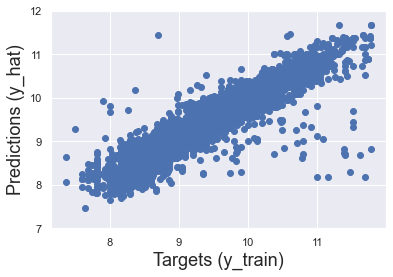

In [88]:
# Vamos a comparar las predicciones con la realidad, para ello vamos a crear un gráfico
# con los resultados en ejes distintos
# Por lo cual mientras mas cercano a una línea de 45° mejor sera nuestra predicción
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

# plt.xlim(7,12)
plt.ylim(7,12)
plt.show()

In [89]:
# R-squared del modelo
reg.score(x_train,y_train)

0.8717608954890835

### Bias y weights 

In [90]:
# Create a regression summary where we can compare them with one-another
pd.set_option('display.float_format', lambda x: '%.3f' % x)

reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary['Weights'] = reg_summary['Weights'].round(4)
reg_summary.head()

,Features,Weights
0,Año,0.349
1,Puertas,0.000
2,Kilómetros,-0.098
3,Tipo de combustible_Diésel,0.077
4,Tipo de combustible_Eléctrico,0.011


### Testing

In [91]:
y_hat_test = reg.predict(x_test)

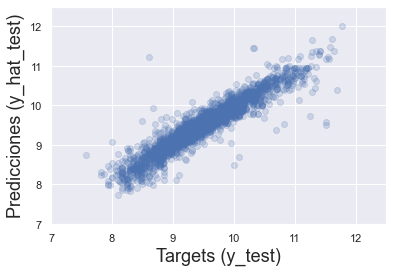

In [92]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predicciones (y_hat_test)',size=18)
plt.xlim(7,12.5)
plt.ylim(7,12.5)
plt.show()

In [93]:
# Obtenemos precios reales a partir de los logaritmicos
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

c:\programdata\anaconda3\envs\plibre\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [95]:
y_test = y_test.reset_index(drop=True)

In [96]:
# También pondremos los targets en el mismo dataset que las predicciones para poder compararlas
df_pf['Target'] = np.exp(y_test)

df_pf.head()

,Prediction,Target
0,18260.512,8600.000
1,39013.049,44900.000
2,9306.938,8800.000
3,17009.764,16950.000
4,10442.698,9500.000


In [97]:
# Calculamos la diferencia entre los targets y las predicciones
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Obtenemos diferencia porcentual para saber que tan lejor estuvimos % de los resultados
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,18260.512,8600.000,-9660.512,112.332
1,39013.049,44900.000,5886.951,13.111
2,9306.938,8800.000,-506.938,5.761
3,17009.764,16950.000,-59.764,0.353
4,10442.698,9500.000,-942.698,9.923


In [98]:
# Vemos una descripción de nuestro dataset
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,3024.000,3024.000,3024.000,3024.000
mean,inf,16087.992,-inf,inf
std,NaN,13248.644,NaN,NaN
min,0.000,1950.000,-inf,0.007
25%,8810.019,8500.000,-1325.340,4.812
50%,12877.315,12390.000,-144.910,10.489
75%,18273.891,18762.500,1165.045,19.562
max,inf,129800.000,87460.952,inf


In [99]:
df_pf.sort_values('Prediction', ascending = False).head()

,Prediction,Target,Residual,Difference%
2718,inf,9000.000,-inf,inf
1558,inf,7800.000,-inf,inf
1080,inf,13750.000,-inf,inf
2514,inf,14500.000,-inf,inf
980,inf,33500.000,-inf,inf


In [124]:
# Pareciera haber unos errores en las predicciones, por sobre todo en vehículos en los cuales no tenemos
# información disponible como para realzar una predicción, para simplificar el caso de estudio
# vamos a borrar estos vehículos del dataset de predicciones
df_pf.replace([np.inf, -np.inf], np.nan, inplace=True)

df_pf.dropna(inplace = True)

In [125]:
df_pf = df_pf[df_pf['Prediction'] != 0] # Predicciónes con valores 0 se dan generalmente por falta de data

In [126]:
# Finalmente, vemos una última descripciones de los resultados
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,3017.000,3017.000,3017.000,3017.000
mean,15723.099,16092.985,369.886,15.217
std,11651.666,13257.447,5845.300,28.180
min,2314.419,1950.000,-68882.514,0.007
25%,8811.632,8500.000,-1322.907,4.809
50%,12877.315,12390.000,-142.309,10.453
75%,18239.905,18800.000,1164.528,19.430
max,164286.163,129800.000,87460.952,1252.409


In [128]:
df_pf.sort_values(by='Difference%').head()

,Prediction,Target,Residual,Difference%
2922,6500.463,6500.000,-0.463,0.007
2488,31996.403,31990.000,-6.403,0.020
1413,31996.403,31990.000,-6.403,0.020
149,17996.621,17990.000,-6.621,0.037
1881,6497.290,6500.000,2.710,0.042


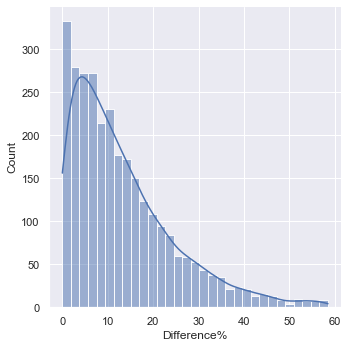

In [77]:
# Como ya se ha hecho anteriormente, vamos a gráficar la distribución de nuestros error porcentual.
# Para ello vamos a quitar el 2# de los errores mas grandes. Por que? Estos errores pertenecen a autos
# que no estan funcionando o que han sido dañados por acciedentes, eventos los cuales no entrenamos nuestro modelo para que predijera

q = df_pf['Difference%'].quantile(0.98)
data_1 = df_pf[df_pf['Difference%'] < q]
sns.displot(data_1['Difference%'], kde=True)

In [78]:
perc_less_5 = df_pf[df_pf['Difference%'] < 5].Prediction.count()
perc_less_10 = df_pf[df_pf['Difference%'] < 10].Prediction.count()
perc_less_15 = df_pf[df_pf['Difference%'] < 15].Prediction.count()
total = len(df_pf)
var_5 = str(round(perc_less_5 / total, 2 ) * 100) + '%'
var_10 = str(round(perc_less_10 / total, 2 ) * 100) + '%'
var_15 = str(round(perc_less_15 / total, 2 ) * 100) + '%'

print("\n Predicciones con error menor a 5%:\n \n" , var_5)
print("\n Predicciones con error menor a 10%:\n \n" , var_10)
print("\n Predicciones con error menor a 15%:\n \n" , var_15)


 Predicciones con error menor a 5%:
 
 26.0%

 Predicciones con error menor a 10%:
 
 48.0%

 Predicciones con error menor a 15%:
 
 65.0%


# Dataset final con Predicciones adjuntas

In [167]:
# A manera de finalizar nuestro tiempo con el dataset, adjuntaremos al dataset original las predicciones
# Esto es simplemente para mayor visibilidad
all_predictions = reg.predict(inputs_scaled)

df_set['Prediction'] = np.exp(all_predictions)

df_set.replace([np.inf, -np.inf], np.nan, inplace=True)
df_set.dropna(subset = ['Prediction'], inplace = True)
df_set = df_set[df_set['Prediction'] != 0]
df_set.drop(['Marca','Modelo', 'log_precio'], axis = 1,inplace = True)

c:\programdata\anaconda3\envs\plibre\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [174]:
df_set

,Nombre,Precio,Año,Tipo de combustible,Puertas,Kilómetros,Prediction
1,Suzuki Alto 0.8 800,6500.000,2015,Nafta,5.000,103000,7050.052
2,Volkswagen Up! Move,14890.000,2021,Nafta,4.000,0,14770.900
3,Chevrolet S-10 pick up Diesel,7900.000,1998,Diésel,2.000,280000,9671.632
4,Renault Sandero 1.0 Zen,13000.000,2020,Nafta,5.000,14000,16047.366
5,Volkswagen Saveiro saveiro doble cabina Cross,20990.000,2021,Nafta,2.000,0,18179.609
...,...,...,...,...,...,...,...
18081,Renault Duster 2.0 Ph2 4x2 Privilege 143cv,16000.000,2015,Nafta,5.000,54000,14870.403
18082,Chevrolet Sail 1.4 Lt,7600.000,2014,Nafta,4.000,99000,9323.853
18083,Fiat Strada 1.6 Adventure Cd 115cv,10300.000,2013,Nafta,2.000,162800,9487.461
18084,Renault Fluence 2.0 Ph2 Privilege Cvt 143cv,16500.000,2016,Nafta,4.000,104000,15097.204


# Otros datos de interes y consideraciones finales

### Datos de interes

In [76]:
# Antes de llegar a reflexiones y conclusiones finales voy a hacer unas pequeñas inferencias sobre el dataset en cuestión.
# Sería interesante tener datos como cuantos años son usados vehículos antes de ser puestos a la venta
# y cuantos kilómetros han recorrido esos vehículos.
# Cuales son las marcas y modelos mas vendidos?

# Como vamos a necesitar quitar los vehículos 0 km para responder a alguna de estas preguntas, iremos creando el dataset
data_cleaned_zeroless = data_cleaned[data_cleaned['Kilómetros'] != 0]

In [77]:
year_mean = round(data_cleaned_zeroless['Año'].mean())
km_mean = round(data_cleaned_zeroless['Kilómetros'].mean())
print("\n Año promedio de uso de vehículos usados a la venta:\n \n" , 2021 - year_mean)
print("\n Kilómetros promedio de autos usados a la venta:\n \n" , km_mean)


 Año promedio de uso de vehículos usados a la venta:
 
 10

 Kilómetros promedio de autos usados a la venta:
 
 117526


In [78]:
model_mode = data_cleaned_zeroless['Modelo'].mode()[0]
count_model_mode = data_cleaned_zeroless[data_cleaned_zeroless['Modelo'] == model_mode].Modelo.count()

marca_mode = data_cleaned_zeroless['Marca'].mode()[0]
count_marca_mode = data_cleaned_zeroless[data_cleaned_zeroless['Marca'] == marca_mode].Marca.count()

In [79]:
count_marca_mode = str(round( count_marca_mode / total , 2 ) * 100) + '%'
count_model_mode = str(round( count_model_mode / total , 2 ) * 100) + '%'

print("\n Marca mas vendida de usados:\n \n" , marca_mode, ' Participación: ' , count_marca_mode )
print("\n Modelo mas vendido de usados:\n \n" , model_mode, ' Participación: ' , count_model_mode)


 Marca mas vendida de usados:
 
 Chevrolet  Participación:  64.0%

 Modelo mas vendido de usados:
 
 Gol  Participación:  22.0%


### Consideraciones finales

Para cerrar el proyecto quiero aportar dos cosas.

La primera es que el proyecto fue creado al correr de un fin de semana, hay varios puntos mejorables respecto al mismo, los resultados obtenidos no deben ser tomados como lo mejor obtenible respecto al dataset que se tiene, sino un benchmark mínimo de resultados a partir del cual se puede mejorar. 
Como mejorarlos? Una buena idea que requeriría un poco mas de dedicación de tiempo es usar un modelo como knn imputation para rellenar los valores faltantes de Motor, Transmisión y Tipo de carrocería de manera tal de poder usar esos features para el modelo. 
Otra idea podría ser mejorar como obtenemos la marca y el modelo. 

La segunda es que la data fue extraida en un día particular de abril del año 2021 usando el método estipulado en el repositorio, la mayoría de los errores o faltas en el modelo se debieron mayormente a la falta de data, si se usase este tipo de algoritmo para recolectar información varias veces al año, podríamos obtener un mayor dataset y realizar mejores predicciones.

Sin mas que agregar, espero halla sido una divertida lectura.

Saludos, 

Emanuel Rieiro